In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dt=pd.read_csv('amazon_product.csv')
data = dt.drop(['product_url','product_original_price' ,'product_availability' ,'product_photo', 'climate_pledge_friendly', 'sales_volume', 'delivery', 'unit_price', 'unit_count','asin'], axis=1)
data['product_star_rating'] = pd.to_numeric(data['product_star_rating'], errors='coerce')
data['product_star_rating']=data['product_star_rating'].fillna(data['product_star_rating'].median())

In [2]:
data

,Unnamed: 0,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,has_variations
0,0,Moto G Play 2023 3-Day Battery Unlocked Made f...,$99.99,USD,4.0,2929,10,$64.89,False,False,True,True
1,1,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",$149.74,USD,4.2,135,8,$145.87,False,False,True,False
2,2,Total by Verizon | Samsung Galaxy A03s | Locke...,$49.88,USD,3.9,205,1,$49.88,False,False,True,False
3,3,Google Pixel 7a - Unlocked Android Cell Phone ...,$335.00,USD,4.3,2248,30,$289.99,False,False,False,True
4,4,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",$199.99,USD,4.1,423,2,$150.09,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,Greatish Hits: I Followed My Dreams and My Dre...,$34.98,USD,4.4,0,1,$34.98,False,False,False,False
60,60,Swan Song,$14.99,USD,4.4,14471,1,$14.99,True,False,False,False
61,61,Bluey: Let&#x27;s Play!,$0.00,USD,3.5,270,1,$0.00,False,False,False,False
62,62,Xbox Wireless Controller – Sky Cipher Special ...,$69.99,USD,2.6,12,1,$69.99,True,False,False,False


In [11]:
def convert_dollar_number(dollar):
    return float(dollar.replace('$',''))

# data['product_price'] = data['product_price'].apply(convert_dollar_number)
data['product_minimum_offer_price'] = data['product_minimum_offer_price'].apply(convert_dollar_number)
data


,Unnamed: 0,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,has_variations
0,0,Moto G Play 2023 3-Day Battery Unlocked Made f...,99.99,USD,4.0,2929,10,64.89,False,False,True,True
1,1,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",149.74,USD,4.2,135,8,145.87,False,False,True,False
2,2,Total by Verizon | Samsung Galaxy A03s | Locke...,49.88,USD,3.9,205,1,49.88,False,False,True,False
3,3,Google Pixel 7a - Unlocked Android Cell Phone ...,335.00,USD,4.3,2248,30,289.99,False,False,False,True
4,4,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",199.99,USD,4.1,423,2,150.09,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,Greatish Hits: I Followed My Dreams and My Dre...,34.98,USD,4.4,0,1,34.98,False,False,False,False
60,60,Swan Song,14.99,USD,4.4,14471,1,14.99,True,False,False,False
61,61,Bluey: Let&#x27;s Play!,0.00,USD,3.5,270,1,0.00,False,False,False,False
62,62,Xbox Wireless Controller – Sky Cipher Special ...,69.99,USD,2.6,12,1,69.99,True,False,False,False


In [14]:
data = data.drop(['Unnamed: 0'],axis=1)
data

,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,has_variations
0,Moto G Play 2023 3-Day Battery Unlocked Made f...,99.99,USD,4.0,2929,10,64.89,False,False,True,True
1,"SAMSUNG Galaxy A15 5G (SM-156M/DSN), 128GB 6GB...",149.74,USD,4.2,135,8,145.87,False,False,True,False
2,Total by Verizon | Samsung Galaxy A03s | Locke...,49.88,USD,3.9,205,1,49.88,False,False,True,False
3,Google Pixel 7a - Unlocked Android Cell Phone ...,335.00,USD,4.3,2248,30,289.99,False,False,False,True
4,"SAMSUNG Galaxy A15 5G A Series Cell Phone, 128...",199.99,USD,4.1,423,2,150.09,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
59,Greatish Hits: I Followed My Dreams and My Dre...,34.98,USD,4.4,0,1,34.98,False,False,False,False
60,Swan Song,14.99,USD,4.4,14471,1,14.99,True,False,False,False
61,Bluey: Let&#x27;s Play!,0.00,USD,3.5,270,1,0.00,False,False,False,False
62,Xbox Wireless Controller – Sky Cipher Special ...,69.99,USD,2.6,12,1,69.99,True,False,False,False


In [3]:
O_price=[]
I_price=[]

for i in data.product_price:
    number=float(i.replace('$',''))
    O_price.append(number)
# print(O_price)


for i in data.product_minimum_offer_price:
    number_=float(i.replace('$',''))
    I_price.append(number_)
# print(I_price)

data['product_star_rating'] = data['product_star_rating'].astype(str)# thay đổi data type   
for i in data.product_star_rating:
    print(type(i))
data["product_price"]=O_price
data['product_minimum_offer_price']=I_price
# data["unit"]="$"
# print(data)

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [ ]:
Y = data[['product_price', 'product_minimum_offer_price']]
X = data['product_title']
plt.figure(figsize=(20, 25))
# Set up the bar positions
index = np.arange(len(X))
bar_width = 0.4

# Create the bar chart
plt.bar(index, Y['product_price'], bar_width, color='skyblue', label='Product Price')
plt.bar(index + bar_width, Y['product_minimum_offer_price'], bar_width, color='salmon', label='Minimum Offer Price')

# Add labels, title, and legend
plt.xlabel('Product Title', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.title('Product Prices vs Minimum Offer Prices', fontsize=14)
plt.xticks(index + bar_width / 2, X, rotation=45, ha='right')
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Rating & Offers

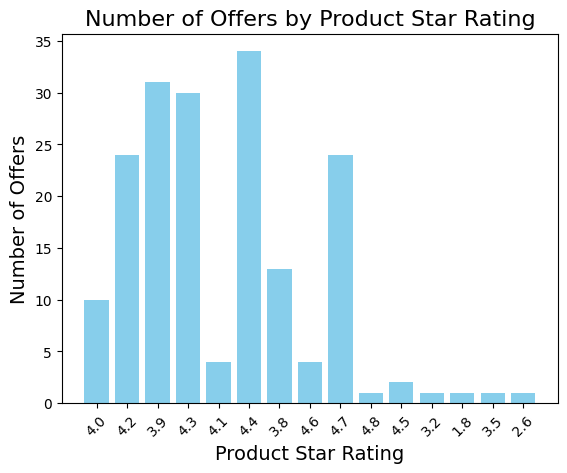

In [94]:
# Create the bar chart
plt.figure()  # Optional: to set the size of the figure
plt.bar(data['product_star_rating'], data['product_num_offers'], color='skyblue')

# Add labels and title
plt.xlabel('Product Star Rating', fontsize=14)
plt.ylabel('Number of Offers', fontsize=14)
plt.title('Number of Offers by Product Star Rating', fontsize=16)

# Optionally, rotate the x-axis labels if necessary
plt.xticks(rotation=45)
# Display the chart
plt.show()